# Seminar 3. Model complexity.
Mikhail Belyaev

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## The polinom example

In [6]:
def f_poly(x, coefs):
    summands = [x**(power+1) * coef for power, coef in enumerate(coefs)]
    return np.array(summands).sum(0)

In [7]:
import numpy as np
poly_coefs = [1, -0.5, -1, 0.6]
noise_std = 0.1

X = np.random.rand(20, 1) * 2 - 1
y = f_poly(X, poly_coefs)
y += np.random.randn(*y.shape) * noise_std

X_test = np.linspace(-1, 1, 100)[:, np.newaxis]
y_noiseless = f_poly(X_test, poly_coefs)
y_test = y_noiseless + np.random.randn(*y_noiseless.shape) * noise_std

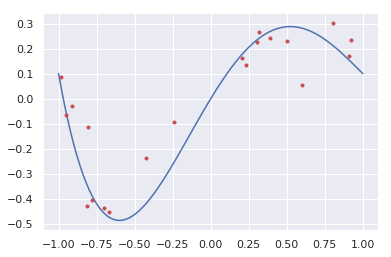

In [8]:
plt.plot(X_test, y_noiseless)
plt.plot(X, y, '.r')

#### A pipeline for a polynomial fit

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def plot_results(y_pred):
    plt.plot(X_test, y_noiseless)
    plt.plot(X_test, y_pred, '--g')
    plt.plot(X, y, '.r')

In [10]:
model = make_pipeline(PolynomialFeatures(), 
                      Ridge())

#### TODO: fit the model & plot predictions

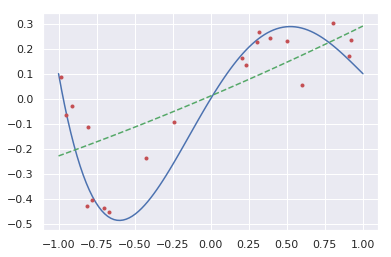

In [11]:
model.fit(X, y)
y_pred = model.predict(X_test)
plot_results(y_pred)

#### TODO: 
- import mean square error from sklearn.metrics.regression
- estimate accuracy of the prediction on
  * the train set
  * the test set
  * the noiseless version of the test set


0.0282621401804403
0.043837401450896395
0.03608315765944382


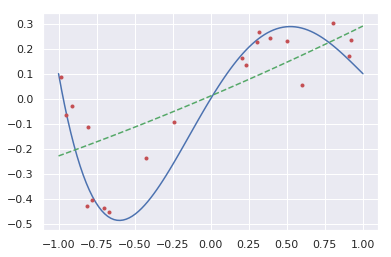

In [12]:
from sklearn.metrics.regression import mean_squared_error as mse
model.fit(X, y)
y_pred = model.predict(X_test)
plot_results(y_pred)
print(mse(y, model.predict(X)))
print(mse(y_test, model.predict(X_test)))
print(mse(y_noiseless, model.predict(X_test)))
# p

#### TODO: try different values of parameters (degree & alpha) and find the best possible fit

0.0031437181925819805
1.951487420907855
1.9434676319151487


(-1, 1)

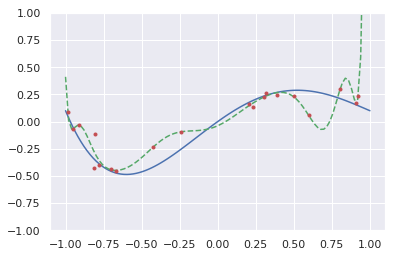

In [15]:
model = make_pipeline(PolynomialFeatures(degree=20), 
                      Ridge(alpha=1e-9))

model.fit(X, y)
y_pred = model.predict(X_test)
plot_results(y_pred)
print(mse(y, model.predict(X)))
print(mse(y_test, model.predict(X_test)))
print(mse(y_noiseless, model.predict(X_test)))
# p
plt.ylim([-1, 1])

#### TODO:  Estimate errors for the best possible fit, compare its errors with the previous results

#### TODO: set *alpha=1e-7*; calculate & plot three errors as functions of *degree*

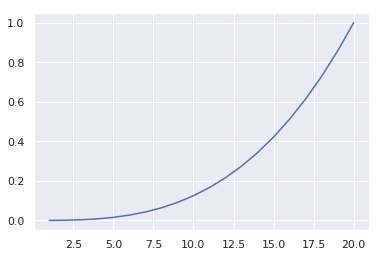

In [16]:
# example
x_plt_range = range(1, 21) # 1, 2, ..., 20
y_plt = []
for x_plt in x_plt_range:
    y_plt.append((x_plt/20)**3)
    
plt.plot(x_plt_range, y_plt)

In [17]:
degree_range = range(1, 21) # 1, 2, ..., 20
errors_train = []
errors_test = []
errors_test_noiseless = []
for degree in degree_range:
    model = ...
    error = mse(...)
    errors_train.append(error)
    ...
    
plt.plot(degree_range, errors_train)
plt.plot(degree_range, errors_test)
plt.plot(degree_range, errors_test_noiseless)

TypeError: mean_squared_error() missing 1 required positional argument: 'y_pred'

#### TODO: set degree=20 and try different regularization parameters alpha; plot the same lines

#### TODO : compare the obtained graphs with an ideal theoretical plot below

## Illustrations 

### Bias-Variance tradeoff
check a great tutorial http://scott.fortmann-roe.com/docs/BiasVariance.html

<div style="width:100%; text-align:center">
<img src=http://scott.fortmann-roe.com/docs/docs/BiasVariance/biasvariance.png width=500px>
</div>

### Lasso vs Ridge regression

<div style="width:60%; text-align:center">
<img src=https://1.bp.blogspot.com/-tXq6Nl2lcNg/V3qzttiZ4sI/AAAAAAAAN_M/6nmjgwydWJUy5Kqt9gFg2Nb12BCTcD4ogCLcB/s1600/LASSO.png>
</div>